<a href="https://colab.research.google.com/github/BrianKipngeno/Customer-segmentation-using-k-means-with-PyTorch/blob/main/Customer_segmentation_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer segmentation using K-means  with PyTorch

Clustering is a type of unsupervised learning that involves grouping similar data points together based on certain characteristics. K-means is a popular clustering algorithm that partitions the dataset into K clusters, assigning each data point to the cluster with the nearest centroid. In our example, we will leverage K-means to our neural network to create clusters and make predictions.


This can be beneficial as it allows the model to incorporate intrinsic data patterns that may aid in classification. By capturing underlying structures through clustering, the model gains additional information, potentially improving its ability to discern between different classes.


Clustering occurs in four steps:

- Step 1: Data preparation
- Step 2: Applying k-means
- Step 3: Visualizing the clusters
- Step 4: Making predictions

We have a dataset on mall segmentation. Our goal is to perform customer segmentation using K-means clustering. Customer segmentation involves grouping customers with similar characteristics together, which can be valuable for targeted marketing and personalized services.

In [1]:
# Installing k-means for PyTorch
!pip install kmeans-pytorch

In [2]:
# Loading the necessary libraries from k-means
from kmeans_pytorch import kmeans, kmeans_predict

### Step 1: Data preparation

In [5]:
# Loading our dataset
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://bit.ly/4bjrKs7')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We extract relevant features in order to create more effective interpretable, and computationally efficient models.

In [6]:
# Extract relevant features and convert them to a PyTorch tensor.
features = df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()


In [7]:
# Convert the NumPy array to a PyTorch tensor
data_tensor = torch.tensor(features, dtype=torch.float32)

### Step 2: Applying k-means

We now perform k-means clustering using the kmeans function from the kmeans_pytorch library.

- Cluster_ids contains the cluster assignments for each data point, and - cluster_centers contains the coordinates of the cluster centers.
Setting the num_clusters to 5 suggests that we want to partition your data into 5 distinct groups or clusters.

In [8]:
# Let's create our clusters.
num_clusters = 5

cluster_ids, cluster_centers = kmeans(data_tensor, num_clusters=num_clusters)

running k-means on cpu..


[running kmeans]: 5it [00:00, 37.72it/s, center_shift=0.000000, iteration=5, tol=0.000100]


The silhouette score is a measure of how well-defined and separated the clusters are in a clustering solution. The silhouette score ranges from -1 to 1. A high silhouette score (close to 1) indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. We can play around with the num_clusters to determine the number with the silhouette closest to 1.

In [9]:
# Calculate silhouette score to evaluate our clusters.
from sklearn.metrics import adjusted_rand_score, silhouette_score

sil_score = silhouette_score(data_tensor.numpy(), cluster_ids.numpy())

print(f"Silhouette Score for {num_clusters} clusters: {sil_score}")

Silhouette Score for 5 clusters: 0.5532176494598389


### Step 3: Cluster visualization

Visualizing clusters is important for gaining insights, validating results, and communicating findings effectively. It complements quantitative metrics and enhances the overall understanding of the data structure and clustering outcomes.

- We plot the data points in the feature space, where x=features[:, 0] represents the 'Annual Income' and y=features[:, 1] represents the 'Spending Score'.
- The color of each point is determined by its cluster assignment (hue=cluster_ids.numpy()), and the color palette 'viridis' is used.
- The centroids are marked with red 'X' markers. The s=200 parameter controls the size of the markers.

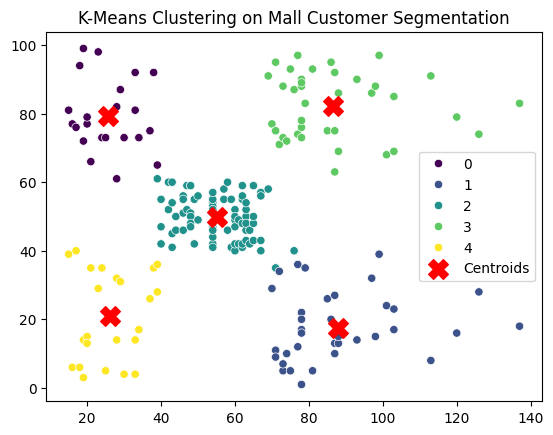

In [10]:
# Let's visualize our clusters
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=cluster_ids.numpy(), palette='viridis')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering on Mall Customer Segmentation')

plt.legend()

plt.show()

### Step 4: Making predictions

Finally, we can evaluate our model by clustering a new data point (20, 60): an individual with annual income of 20 and spending score of 60.

In [11]:
# Inference on a new data point.
new_data_point = np.array([[20, 60]])

# Convert the standardized new data point to a PyTorch tensor.
new_data_tensor = torch.tensor(new_data_point, dtype=torch.float32)

# Calculate Euclidean distances to cluster centers.
distances = torch.norm(cluster_centers - new_data_tensor, dim=1)

# Get the index of the closest cluster.
predicted_cluster_label = torch.argmin(distances).item()

print(f'The predicted cluster for the new data point is: {predicted_cluster_label}')

The predicted cluster for the new data point is: 0
